# 📝 **Solución de Guía #3**

## 👥 **Integrantes**:  
- *Miguel Alejandro Díaz Cely*
- *Wilson Sarmiento*
- *David Fernando Delgado Bernal*
- *Emily Del Carmen Tench Pérez*

# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [ ]:
# Solución propuesta
import pandas as pd

# Cargar el dataset
file_path = "/content/accidents-1.csv"

# Leer el archivo con el delimitador correcto (;)
df = pd.read_csv(file_path, delimiter=";", low_memory=False)

# Mostrar información general del dataframe en formato tabular
info_df = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.count().values,
    "Data Type": df.dtypes.values
})

# Mostrar la información y las primeras filas del dataset
from IPython.display import display
display(info_df)  # Muestra la info del DataFrame como tabla
display(df.head())  # Muestra las primeras filas


,Column,Non-Null Count,Data Type
0,DATE,238522,object
1,TIME,238522,object
2,BOROUGH,238522,object
3,ZIP CODE,238452,float64
4,LATITUDE,231544,float64
5,LONGITUDE,231544,float64
6,ON STREET NAME,153918,object
7,NUMBER OF PEDESTRIANS INJURED,238522,int64
8,NUMBER OF PEDESTRIANS KILLED,238522,int64
9,NUMBER OF CYCLIST INJURED,238522,int64


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [ ]:
# Imputación de valores nulos

# 1. Imputar ZIP CODE con la moda dentro de cada municipio
df['ZIP CODE'] = df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

# 2. Imputar LATITUDE y LONGITUDE con la media dentro de cada municipio
df['LATITUDE'] = df.groupby('BOROUGH')['LATITUDE'].transform(lambda x: x.fillna(x.mean()))
df['LONGITUDE'] = df.groupby('BOROUGH')['LONGITUDE'].transform(lambda x: x.fillna(x.mean()))

# 3. Reemplazamos valores nulos en ON STREET NAME por 'UNKNOWN' (corrección de advertencia)
df.loc[df['ON STREET NAME'].isnull(), 'ON STREET NAME'] = 'UNKNOWN'

# 4. Reemplazamos valores nulos en CONTRIBUTING FACTOR VEHICLE con 'Unspecified'
factor_columns = [col for col in df.columns if 'CONTRIBUTING FACTOR VEHICLE' in col]
df[factor_columns] = df[factor_columns].fillna('Unspecified')

# 5. Reemplazamos valores nulos en VEHICLE TYPE CODE con 'Unknown'
vehicle_columns = [col for col in df.columns if 'VEHICLE TYPE CODE' in col]
df[vehicle_columns] = df[vehicle_columns].fillna('Unknown')

# Verificamos que ya no hay valores nulos en las columnas tratadas
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
display(missing_values)  # Mostrar como tabla


,Column,Missing Values
0,DATE,0
1,TIME,0
2,BOROUGH,0
3,ZIP CODE,0
4,LATITUDE,0
5,LONGITUDE,0
6,ON STREET NAME,0
7,NUMBER OF PEDESTRIANS INJURED,0
8,NUMBER OF PEDESTRIANS KILLED,0
9,NUMBER OF CYCLIST INJURED,0


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [X] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [X] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [X] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [X] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


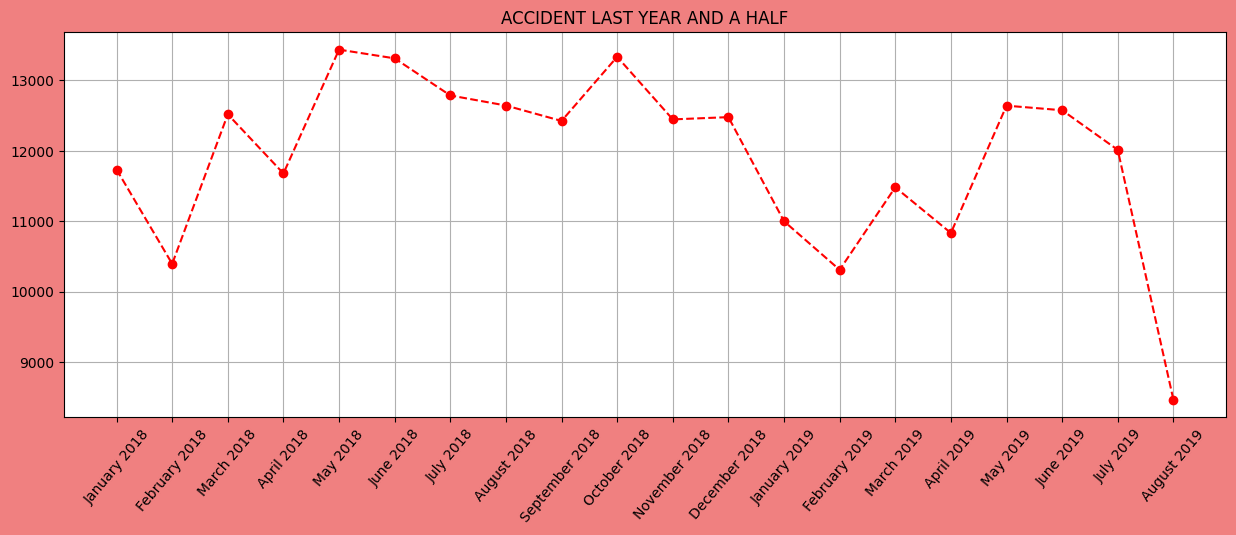

In [ ]:
# Se importa la biblioteca matplotlib con la extensión pypltot.
import matplotlib.pyplot as plt
# Se crea una columna con los meses en la base de datos, y se convierte Date en formato de period .to_period()
df["DATE"] = pd.to_datetime(df["DATE"], errors='coerce')
df["MONTH"] = df["DATE"].dt.to_period("M")
# se crea una variable que agrupa por el mes, y cuenta los accidentes por ese mes.
mes  = df.groupby("MONTH")["CONTRIBUTING FACTOR VEHICLE 1"].count()
promedio = mes.mode()
# Se le indica al programa que muestre el mes en letras y el año.
letras = mes.index.strftime("%B %Y")

# Se crean los ejes para ser ploteados, x y y como variables.
x= letras
y=mes.values
# Se utilizan las funciones de Metplotlib para gráficar las funciones. Se agrega el tamaño del grafico, color,grid,titulos y demás.
plt.figure(figsize=(15,5), facecolor="lightcoral")
plt.grid()
plt.title("ACCIDENT LAST YEAR AND A HALF")
plt.xticks(rotation=50)
plt.plot(x,y, color="r", marker="o", linestyle="--", label="Accidents")
plt.show()



El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?


# Los meses con menos incidencias según la gráfica son Enero, Febrero y abril con incidencias dentro de los 10 mil y 12 mil accidentes. Esto se puede deber a que en estas fechas las personas se encuentras menos en Nueva York por tema de viajes y vacaciones, lo que puede generar menos accidentes. En cambio, al estar más personas en la ciudad trabajando, estudiando, o viviendo aumentar las posibilidades de accidentes.

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

En el gráfico se muestra claramente que los picos de accidentes en Nueva York abarcan desde las 8 am hasta las 6pm (14 mil -17 mil acc).
 Esto claramente coincide en las horas de mayor actividad en la ciudad.
 Sin embargo después de las 7 de la noche el número de accidentes baja a menos de 10 mil,
 llegando a menos de 4000 mil desde la 1 am hasta las 5 am.

En el gráfico se muestra claramente que los picos de accidentes en Nueva York abarcan desde las 8 am hasta las 6pm (14 mil -17 mil acc).
 Esto claramente coincide en las horas de mayor actividad en la ciudad. 
 Sin embargo después de las 7 de la noche el número de accidentes baja a menos de 10 mil, 
 llegando a menos de 4000 mil desde la 1 am hasta las 5 am.


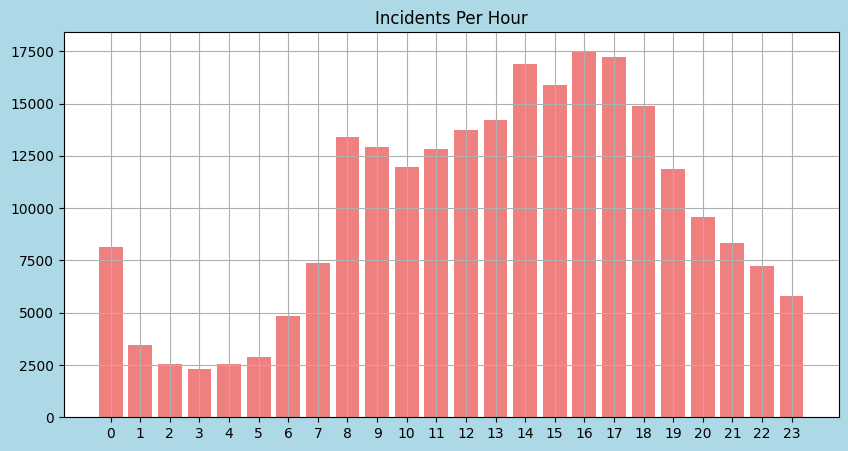

In [ ]:
# A la columna time se le da un formato de hora, y después se crea un acolumna llamada hour que contiene solo la hora en HH:MM.
df["TIME"]= pd.to_datetime(df["TIME"], format="%H:%M")

df["HOUR"]= df["TIME"].dt.hour
# Despues se crea una variable que agrupa las horas y hace un conteo en las causas de los accidentes.
conteo = df.groupby("HOUR")["CONTRIBUTING FACTOR VEHICLE 5"].count()
# Se crean los ejes para ser graficados.
x= conteo.index
Y= conteo.values
# Se imprime la respuesta a la pregunta.
print("En el gráfico se muestra claramente que los picos de accidentes en Nueva York abarcan desde las 8 am hasta las 6pm (14 mil -17 mil acc).\n Esto claramente coincide en las horas de mayor actividad en la ciudad. \n Sin embargo después de las 7 de la noche el número de accidentes baja a menos de 10 mil, \n llegando a menos de 4000 mil desde la 1 am hasta las 5 am.")
# Se utilizan las funciones de Metplotlib para graficar el código de arriba.
plt.figure(figsize=(10,5), facecolor="lightblue")
plt.grid()
plt.xticks(ticks=x)
plt.title("Incidents Per Hour")
plt.bar(x,Y, color="lightcoral")
plt.show()


En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**Cuando no se agregan las fechas y solo se agregan las horas, se pueden tener sesgos en la lectura de la data, dado que hay épocas del año donde los accidentes son menores sin importar la hora, pueden a ver coincidencias, pero sin el Date solo estamos viendo a grandes razgos la información horaria. **

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

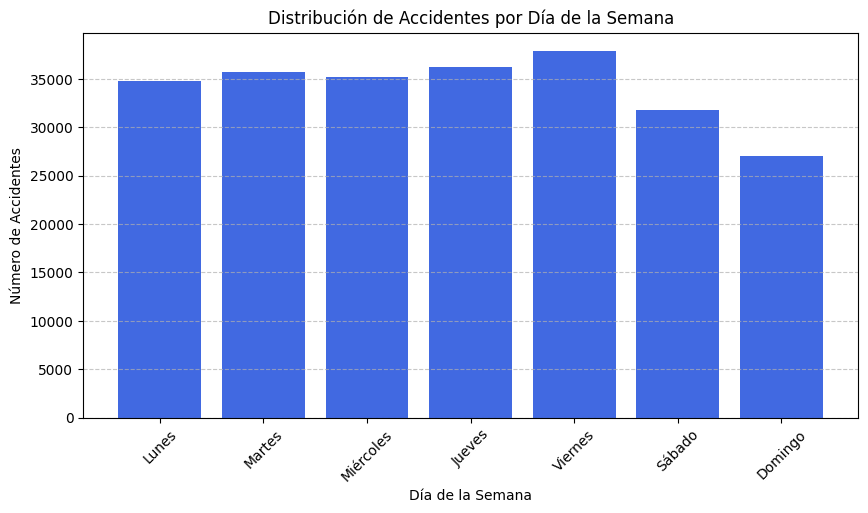

In [ ]:
# Solución propuesta

# Convertir DATE a formato datetime
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")

# Extraemos el dia de la semana
df["DAY_OF_WEEK"] = df["DATE"].dt.weekday

# Contar accidentes por día de la semana
weekly_counts = df["DAY_OF_WEEK"].value_counts().sort_index()

# Cambiamos los numeros a nombres de los dias de la semana
days_map = {0: "Lunes", 1: "Martes", 2: "Miércoles", 3: "Jueves", 4: "Viernes", 5: "Sábado", 6: "Domingo"}
weekly_counts.index = weekly_counts.index.map(days_map)

# Graficamos
plt.figure(figsize=(10, 5))
plt.bar(weekly_counts.index, weekly_counts.values, color="royalblue")
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Accidentes")
plt.title("Distribución de Accidentes por Día de la Semana")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

In [ ]:
import calendar
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.layouts import gridplot

output_notebook()

# Definir el diccionario de áreas por municipio
area = {
    "BRONX": 42.2,
    "BROOKLYN": 69.4,
    "MANHATTAN": 22.7,
    "QUEENS": 108.7,
    "STATEN ISLAND": 57.5
}

# Contar el número total de accidentes por municipio
total_accidents = df.groupby("BOROUGH").size().reset_index(name="Total_Accidents")

# Agregar la información del área
total_accidents["Area_sq_miles"] = total_accidents["BOROUGH"].map(area)

# Calcular la densidad de accidentes (accidentes por milla cuadrada)
total_accidents["Accident_Density"] = total_accidents["Total_Accidents"] / total_accidents["Area_sq_miles"]

# Ordenar municipios para mantener un orden lógico en las gráficas
order = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]
total_accidents["BOROUGH"] = pd.Categorical(total_accidents["BOROUGH"], categories=order, ordered=True)
total_accidents = total_accidents.sort_values("BOROUGH")

# Convertir a ColumnDataSource para Bokeh
source = ColumnDataSource(total_accidents)

# Crear la figura para el número total de accidentes
p1 = figure(x_range=order, width=700, height=500,
            title="Número Total de Accidentes por Municipio",
            x_axis_label="Municipio", y_axis_label="Número de Accidentes")

# Configuración visual (tema oscuro)
p1.background_fill_color = "black"
p1.border_fill_color = "black"
p1.outline_line_color = None
p1.xgrid.grid_line_color = None
p1.ygrid.grid_line_color = "gray"
p1.xaxis.axis_label_text_color = "white"
p1.yaxis.axis_label_text_color = "white"
p1.xaxis.major_label_text_color = "white"
p1.yaxis.major_label_text_color = "white"
p1.title.text_color = "white"

# Barras con color morado y borde fucsia
p1.vbar(x='BOROUGH', top='Total_Accidents', source=source, width=0.5,
        color="purple", line_color="deeppink", legend_label="Total de Accidentes", line_width=3)

# Agregar interacción con HoverTool
hover1 = HoverTool(tooltips=[("Municipio", "@BOROUGH"), ("Accidentes", "@Total_Accidents")])
p1.add_tools(hover1)

# Personalizar la leyenda
p1.legend.label_text_font_size = "8pt"
p1.legend.label_text_color = "white"
p1.legend.location = "top_right"
p1.legend.background_fill_color = "gray"

# Crear la figura para la densidad de accidentes por milla cuadrada
p2 = figure(x_range=order, width=700, height=500,
            title="Densidad de Accidentes por Milla Cuadrada en Cada Municipio",
            x_axis_label="Municipio", y_axis_label="Accidentes por Milla Cuadrada")

# Configuración visual (tema oscuro)
p2.background_fill_color = "black"
p2.border_fill_color = "black"
p2.outline_line_color = None
p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = "gray"
p2.xaxis.axis_label_text_color = "white"
p2.yaxis.axis_label_text_color = "white"
p2.xaxis.major_label_text_color = "white"
p2.yaxis.major_label_text_color = "white"
p2.title.text_color = "white"

# Barras con color morado y borde fucsia
p2.vbar(x='BOROUGH', top='Accident_Density', source=source, width=0.5,
        color="purple", line_color="deeppink", legend_label="Densidad de Accidentes", line_width=3)

# Agregar interacción con HoverTool
hover2 = HoverTool(tooltips=[("Municipio", "@BOROUGH"), ("Densidad", "@Accident_Density{0.2f}")])
p2.add_tools(hover2)

# Personalizar la leyenda
p2.legend.label_text_font_size = "8pt"
p2.legend.label_text_color = "white"
p2.legend.location = "top_right"
p2.legend.background_fill_color = "gray"

# Mostrar gráficos
show(p1)
print('\n')
show(p2)

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

**Respuesta:**

1. ¿Ha aumentado el número de accidentes durante el último año y medio?

- La gráfica muestra la tendencia de accidentes mensuales en Nueva York desde enero de 2018 hasta agosto de 2019. Analizando la evolución:

    - Primer semestre de 2018: Se observa un aumento en los accidentes, alcanzando un pico en mayo-junio de 2018.
    - Segundo semestre de 2018: Se mantiene una tendencia relativamente estable con ligeras variaciones.
    - Inicio de 2019: Hay una disminución notable en enero y febrero.
    - Mitad de 2019: Se recupera el nivel de accidentes, alcanzando un nuevo pico en junio-julio de 2019.
    - Agosto de 2019: Se produce una caída drástica en el número de accidentes.

- **Conclusión:** Durante el último año y medio, el número de accidentes ha mostrado altibajos, pero en general, se mantuvo en niveles altos con una tendencia descendente hacia agosto de 2019.


2. ¿Qué meses parecen tener el menor número de accidentes?

  - Los meses con el menor número de accidentes parecen ser febrero de 2018, febrero de 2019 y agosto de 2019, ya que presentan los puntos más bajos en la gráfica.

3. ¿Cuáles crees que son las razones detrás de esto?

  - **Factores climáticos en febrero:** Febrero es un mes invernal en Nueva York, con posibles condiciones climáticas adversas como nieve y hielo. Esto puede llevar a que menos personas conduzcan, reduciendo así la cantidad de accidentes.

  - **Menor tráfico en agosto:** Muchas personas están de vacaciones en verano, lo que podría disminuir el tráfico en la ciudad y reducir la cantidad de accidentes.

  - **Tendencias estacionales:** Es posible que haya factores estacionales que influyan en la cantidad de accidentes, como cambios en la movilidad de la población debido a festividades o condiciones climáticas.

  - **Falta de datos:** Si vemos una caída abrupta en un mes específico, como en agosto de 2019, podría deberse a que los datos de ese mes no están completos en la base de datos. *(Es posible que esta sea la razón)*

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

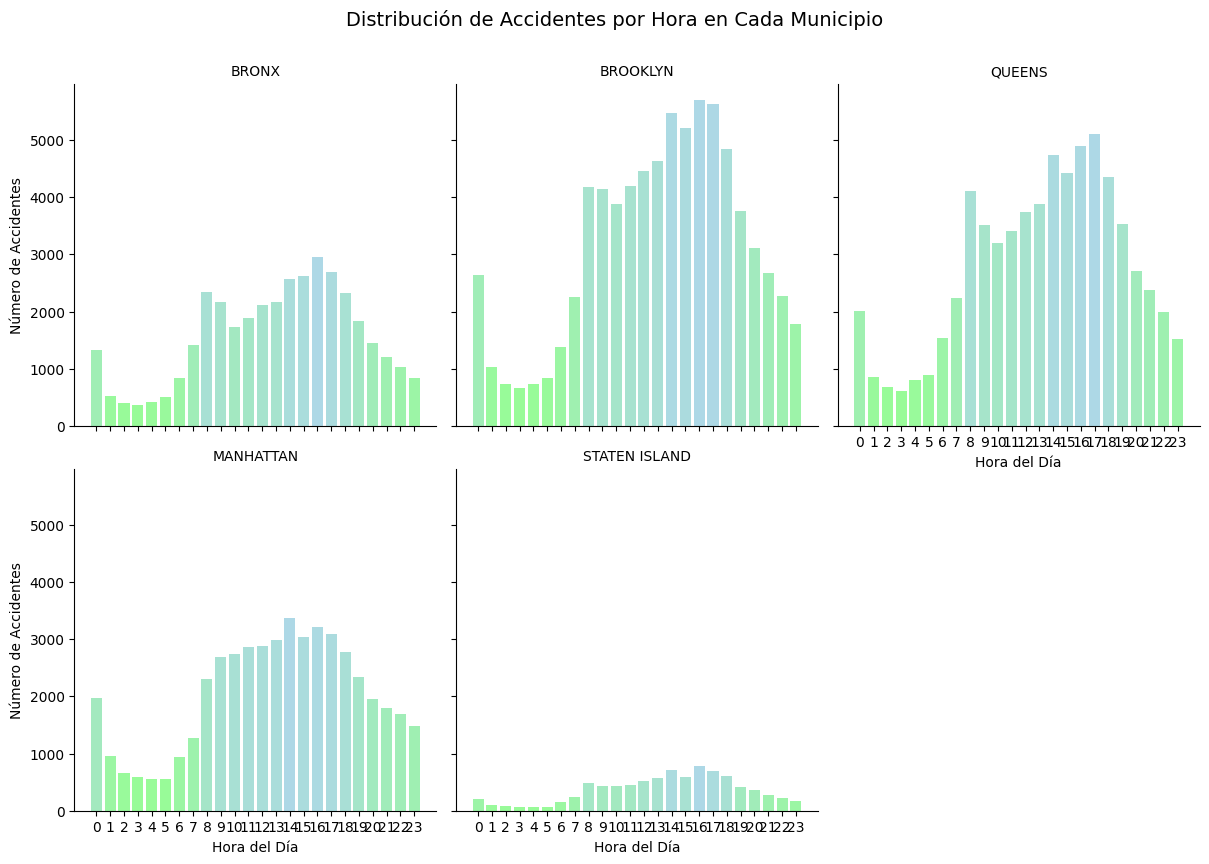

In [ ]:
# Solución propuesta
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Filtrar solo los registros con municipios válidos
df_filtered = df[df['BOROUGH'].notna()]

def barplot_with_gradient(data, **kwargs):
    # Agrupar los datos por hora y asegurarse de incluir todas las 24 horas
    aggregated = data.groupby('HOUR').size().reindex(range(24), fill_value=0)

    # Crear un colormap personalizado que vaya de verde pastel (mínimos) a azul pastel (máximos)
    cmap = mcolors.LinearSegmentedColormap.from_list("pastel_green_blue", ["palegreen", "lightblue"])
    # Normalizar los valores para mapearlos al rango [0, 1]
    norm = plt.Normalize(vmin=aggregated.min(), vmax=aggregated.max())

    ax = plt.gca()
    for hour, count in aggregated.items():
        ax.bar(hour, count, color=cmap(norm(count)), width=0.8)
    ax.set_xticks(range(24))

# Crear la cuadrícula de gráficos para cada municipio
g = sns.FacetGrid(df_filtered, col="BOROUGH", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(barplot_with_gradient)

# Personalizar títulos y etiquetas
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Hora del Día", "Número de Accidentes")
plt.suptitle("Distribución de Accidentes por Hora en Cada Municipio", y=1.05, fontsize=14)

plt.show()


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

###Respuesta ¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos?

Patrones Observados
Manhattan:A lo largo del día presenta accidentes con una disminución de los accidentes en las frnajas de 1am a 7am

Brooklyn y Queens: Presentan un patrón similar a Manhattan, con picos en la mañana y tarde (horas pico), Sin embargo, la cantidad de accidentes nocturnos es menor que en Manhattan.

Bronx:Los accidentes alcanzan su punto máximo durante las horas de la tarde (3pm a 6pm).

Staten Island:Tiene menos accidentes en comparación a los demás.

###Respuesta ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?

Manhattan → Mayor vigilancia en la noche y durante las horas pico (7am a 9am, 4pm a 7pm).
Brooklyn y Queens → Enfocar esfuerzos en las horas pico de tráfico laboral (7am a 9am, 4pm a 7pm).
Bronx → Campañas de seguridad vial en la tarde (3pm a 6pm), cuando se observa un aumento significativo.
Staten Island → Mayor control en horas laborales (7am a 9am, 4pm a 6pm), ya que el resto del día tiene pocos incidentes.

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

Unspecified                       979902
Driver Inattention/Distraction     72203
Failure to Yield Right-of-Way      20413
Following Too Closely              17909
Backing Unsafely                   15068
Passing Too Closely                13378
Passing or Lane Usage Improper     12953
Other Vehicular                    11093
Unsafe Lane Changing                6986
Turning Improperly                  6798
Name: count, dtype: int64


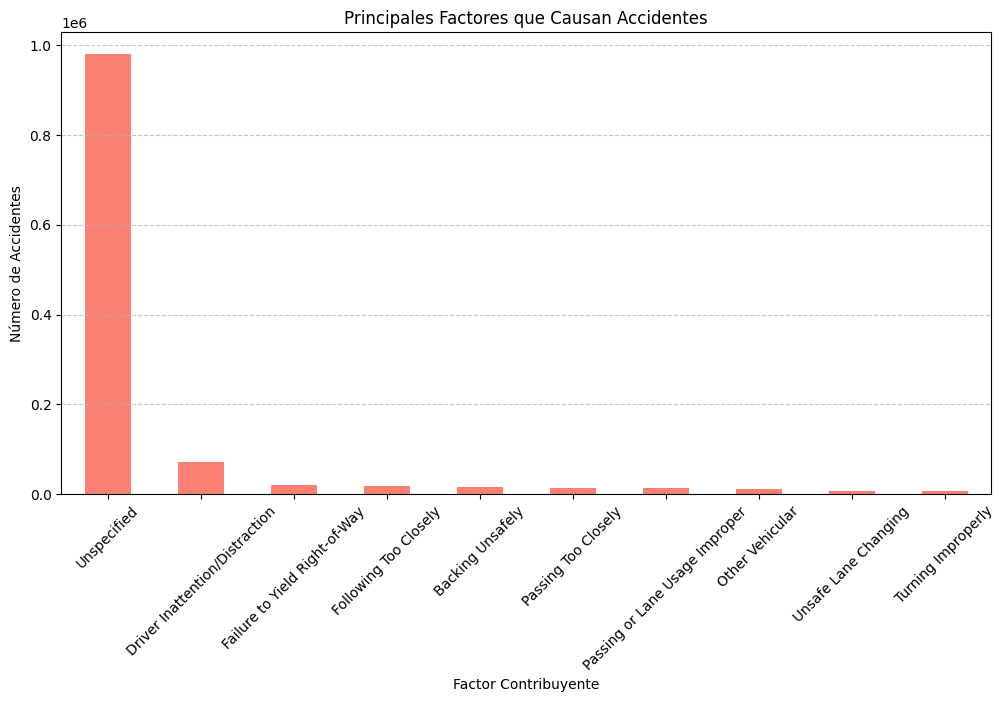

'El factor que provoca mas accidentes es unespecifed con una diferencia muy alta comparada al segundo valor de driver inattention'

In [ ]:
# Solución propuesta

# Lista de columnas de factores contribuyentes
factor_columns = [
    "CONTRIBUTING FACTOR VEHICLE 1",
    "CONTRIBUTING FACTOR VEHICLE 2",
    "CONTRIBUTING FACTOR VEHICLE 3",
    "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5"
]

# Concatenar todas las columnas en una sola serie
factor_series = pd.concat([df[col] for col in factor_columns], axis=0, ignore_index=True)

# Eliminar valores nulos
factor_series = factor_series.dropna()
factor_series = factor_series[factor_series != "UNKNOWN"]

# Contar ocurrencias de cada factor
factor_counts = factor_series.value_counts()

# Mostrar los 10 factores más comunes
print(factor_counts.head(10))

# Graficar los factores más comunes
plt.figure(figsize=(12, 6))
factor_counts.head(10).plot(kind="bar", color="salmon")
plt.xlabel("Factor Contribuyente")
plt.ylabel("Número de Accidentes")
plt.title("Principales Factores que Causan Accidentes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
"""El factor que provoca mas accidentes es unespecifed con una diferencia muy alta comparada al segundo valor de driver inattention"""

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

In [ ]:
# Transformar las columnas de tipos de vehículos en filas individuales
df_melted = df.melt(id_vars=['COLLISION_ID', 'BOROUGH'],
                    value_vars=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                                'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
                                'VEHICLE TYPE CODE 5'],
                    var_name="Vehicle_column", value_name="Vehicle_Type")

# Eliminar valores nulos o vacíos
df_melted = df_melted.dropna(subset=['Vehicle_Type'])

# Eliminar duplicados dentro del mismo accidente
df_unique = df_melted.drop_duplicates(subset=['COLLISION_ID', 'BOROUGH', 'Vehicle_Type'])

# Contar la cantidad de veces que aparece cada tipo de vehículo por municipio
conteo_vehiculos = df_unique.groupby(['BOROUGH', 'Vehicle_Type']).size().reset_index(name='NUMERO_ACCIDENTES')

# Lista de municipios únicos
boroughs = conteo_vehiculos["BOROUGH"].dropna().unique()

# Lista para almacenar los gráficos
plots = []

# Recorrer cada municipio y generar un gráfico individual
for borough in boroughs:
    df_filtered = conteo_vehiculos[conteo_vehiculos["BOROUGH"] == borough]

    # Seleccionar el Top 5 de vehículos más involucrados
    df_filtered = df_filtered.sort_values(by='NUMERO_ACCIDENTES', ascending=True).tail(5)  #filtro

    # Crear source con los datos ordenados
    source = ColumnDataSource(df_filtered)

    # Crear figura con tema oscuro y barras horizontales
    p = figure(y_range=df_filtered["Vehicle_Type"], width=600, height=300,
               title=f"Accidentes en {borough}",
               x_axis_label="Número de Accidentes", y_axis_label="Tipo de Vehículo",
               toolbar_location=None)

    # Estilos de fondo y texto
    p.background_fill_color = "black"
    p.border_fill_color = "black"
    p.outline_line_color = None
    p.xgrid.grid_line_color = "gray"
    p.ygrid.grid_line_color = None
    p.xaxis.axis_label_text_color = "white"
    p.yaxis.axis_label_text_color = "white"
    p.xaxis.major_label_text_color = "white"
    p.yaxis.major_label_text_color = "white"
    p.title.text_color = "white"
    p.xaxis.formatter = NumeralTickFormatter(format="0,0")

    # Barras horizontales con color morado y borde fucsia
    p.hbar(y='Vehicle_Type', right='NUMERO_ACCIDENTES', source=source, height=0.5,
           color="purple", line_color="deeppink", legend_label="Accidentes", line_width=3)

    # Agregar interacción con HoverTool
    hover = HoverTool(tooltips=[("Vehículo", "@Vehicle_Type"), ("Accidentes", "@NUMERO_ACCIDENTES")])
    p.add_tools(hover)

    # Personalizar la leyenda
    p.legend.label_text_font_size = "8pt"
    p.legend.label_text_color = "white"
    p.legend.location = "bottom_right"
    p.legend.background_fill_color = "gray"

    # Agregar gráfico a la lista
    plots.append(p)

# Crear una matriz de gráficos (2 columnas)
grid = gridplot([plots[i:i+2] for i in range(0, len(plots), 2)])

# Mostrar la matriz de gráficos
show(grid)

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

1. Podríasmos hacernos preguntas como: ¿Son suficientes los datos proporcionados?

  - Respuesta: No del todo. Aunque podemos identificar patrones, necesitamos más información sobre:

      - Condiciones climáticas en los días de accidentes.
      - Flujo de tráfico en las zonas críticas.
      - Registros de velocidad de los vehículos involucrados.
      - Medidas de seguridad tomadas antes y después de Vision Zero.


Para analizar qué salió mal en el primer trimestre de 2019 y comparar con 2018, seguiríamos estos pasos con los datos:

  1. Filtrar los datos del primer trimestre de cada año (enero-marzo)
Seleccionamos solo los registros de enero, febrero y marzo de 2018 y 2019.

  2. Identificar accidentes con peatones y ciclistas lesionados o muertos
Filtramos los datos en los que:

- Número de peatones heridos (NUMBER OF PEDESTRIANS INJURED) > 0

- Número de peatones muertos (NUMBER OF PEDESTRIANS KILLED) > 0

- Número de ciclistas heridos (NUMBER OF CYCLIST INJURED) > 0

- Número de ciclistas muertos (NUMBER OF CYCLIST KILLED) > 0


3. Analizar las causas más comunes

- Agrupar por CONTRIBUTING FACTOR VEHICLE 1 para encontrar las principales causas de accidentes.

- Contar los accidentes en cada categoría.

4. Crear mapas de calor

- Generamos dos mapas de calor usando LATITUDE y LONGITUDE:

    - Uno para el primer trimestre de 2018
    - Otro para el primer trimestre de 2019
    - Comparamos la concentración de accidentes para ver si hay nuevas zonas críticas o si las existentes empeoraron.

5. Analizar factores en las zonas críticas

  - Identificar los factores más frecuentes en los accidentes en las zonas con mayor concentración.

6. Recomendaciones

  - Si ciertas causas como "Following Too Closely" o "Passing Too Closely" son comunes, se pueden proponer campañas de concientización o más regulaciones en las zonas afectadas.

  - Si las zonas críticas cambiaron, se pueden inspeccionar físicamente para entender si hay nuevos problemas (como infraestructura deficiente, cambios en el tráfico, etc.).

In [ ]:
import folium
from folium.plugins import HeatMap

# Convertir DATE a datetime y extraer año y mes
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df["YEAR"] = df["DATE"].dt.year
df["MONTH"] = df["DATE"].dt.month

# Filtrar datos del primer trimestre (enero - marzo) de 2018 y 2019
df_2018 = df[(df["YEAR"] == 2018) & (df["MONTH"].between(1, 3))]
df_2019 = df[(df["YEAR"] == 2019) & (df["MONTH"].between(1, 3))]

# Filtrar accidentes con peatones o ciclistas heridos/fallecidos
df_2018 = df_2018[
    (df_2018["NUMBER OF PEDESTRIANS INJURED"] > 0) |
    (df_2018["NUMBER OF PEDESTRIANS KILLED"] > 0) |
    (df_2018["NUMBER OF CYCLIST INJURED"] > 0) |
    (df_2018["NUMBER OF CYCLIST KILLED"] > 0)
]

df_2019 = df_2019[
    (df_2019["NUMBER OF PEDESTRIANS INJURED"] > 0) |
    (df_2019["NUMBER OF PEDESTRIANS KILLED"] > 0) |
    (df_2019["NUMBER OF CYCLIST INJURED"] > 0) |
    (df_2019["NUMBER OF CYCLIST KILLED"] > 0)
]

# Función para crear mapas de calor en Google Colab
def crear_mapa(data, year):
    if data.empty:
        print(f"No hay datos para {year}, no se generará mapa.")
        return None

    print(f"Generando mapa de calor para {year} con {len(data)} puntos...")

    center_lat, center_lon = data["LATITUDE"].mean(), data["LONGITUDE"].mean()
    mapa = folium.Map(location=[center_lat, center_lon], zoom_start=12, width="100%", height="100%")

    HeatMap(data[["LATITUDE", "LONGITUDE"]].values, radius=10).add_to(mapa)

    return mapa

# Crear mapas de calor
mapa_2018 = crear_mapa(df_2018, "Primer Trimestre 2018")
mapa_2019 = crear_mapa(df_2019, "Primer Trimestre 2019")

# Mostrar mapas en Colab
print('Mapa 2018')
mapa_2018

Generando mapa de calor para Primer Trimestre 2018 con 2608 puntos...
Generando mapa de calor para Primer Trimestre 2019 con 2491 puntos...
Mapa 2018


In [ ]:
mapa_2019

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

In [ ]:
# Crear una nueva columna "TOTAL_DEATHS" que sume las muertes de peatones, ciclistas y conductores
df['TOTAL_DEATHS'] = (df['NUMBER OF PEDESTRIANS KILLED'] +
                      df['NUMBER OF CYCLIST KILLED'] +
                      df['NUMBER OF MOTORIST KILLED'])

# Seleccionar las columnas de los tipos de vehículos
vehicle_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Crear un dataframe para contar las muertes por tipo de vehículo
death_counts = pd.Series()

# Iterar sobre las filas y contar las muertes por vehículo, evitando duplicados
for index, row in df.iterrows():
    total_deaths = row['TOTAL_DEATHS']

    for col in vehicle_columns:
        vehicle_type = row[col]
        if pd.notna(vehicle_type):  # Solo contar si el tipo de vehículo no es NaN
            if vehicle_type not in death_counts:
                death_counts[vehicle_type] = 0
            death_counts[vehicle_type] += total_deaths

# Seleccionar los 5 vehículos con más muertes
top_vehicles = death_counts.nlargest(5)

# Convertir los datos a ColumnDataSource para Bokeh
source = ColumnDataSource(top_vehicles.reset_index(name='MUERTES'))

# Crear la figura con tema oscuro
p = figure(x_range=top_vehicles.index.tolist(), width=1000, height=600,
           title="Top 5 Vehículos con Más Muertes en Accidentes",
           x_axis_label="Tipo de Vehículo", y_axis_label="Número de Muertes")

# Estilos de fondo y texto
p.background_fill_color = "black"
p.border_fill_color = "black"
p.outline_line_color = None
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "gray"
p.xaxis.axis_label_text_color = "white"
p.yaxis.axis_label_text_color = "white"
p.xaxis.major_label_text_color = "white"
p.yaxis.major_label_text_color = "white"
p.title.text_color = "white"

# Barras con color morado y borde fucsia
p.vbar(x='index', top='MUERTES', source=source, width=0.5,
       color="purple", line_color="deeppink", legend_label="Muertes por Vehículo", line_width=3)

# Agregar interacción con HoverTool
hover = HoverTool(tooltips=[("Vehículo", "@index"), ("Muertes", "@MUERTES")])
p.add_tools(hover)

# Personalizar la leyenda
p.legend.label_text_font_size = "8pt"
p.legend.label_text_color = "white"
p.legend.location = "top_right"
p.legend.background_fill_color = "gray"

# Mostrar gráfico
show(p)

**Respuesta:**

Según la gráfica, el tipo de vehículo más involucrado en muertes es "Unknown" (Desconocido), y seguido de éste, el vehículo que le sigue es el "Station Wagon/Sport Utility Vehicle". El tipo "Unknown" está asociado con aproximadamente 600 muertes más que el "Station Wagon/Sport Utility Vehicle". Es importante notar que una gran cantidad de registros marcados como "Unknown" sugiere la necesidad de mejorar la recolección de datos sobre los tipos de vehículos involucrados en accidentes.